In [2]:
# Notebook: 4_insights_dashboard.ipynb
# Author: Hope Kimandi
# Dataset: bank_additional_transformed.xlsx

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set visualization style
sns.set(style='whitegrid', palette='muted')

# Load transformed dataset
dataset_path = r'C:\Users\lenovo\OneDrive\Desktop\KEndy\ASSIGNMENTS\DSA Assignments\DSA 2040\Data mining_group project_Hope\DATA\transformed\bank_additional_transformed.xlsx'
df = pd.read_excel(dataset_path)


In [4]:
# Step 1: Target Distribution Insight

target_counts = df['y'].value_counts()
fig1 = px.pie(names=target_counts.index, values=target_counts.values, title='Subscription Distribution (Yes vs No)')
fig1.show()



In [ ]:
# Step 2: Age vs Subscription Insight

fig2 = px.histogram(df, x='age', color='y', barmode='overlay', nbins=30, title='Age Distribution by Subscription')
fig2.show()


In [11]:
# Step 3: Job vs Subscription Insight

import plotly.express as px

# Clean the 'job' column: strip spaces and ensure no nulls
df['job'] = df['job'].astype(str).str.strip()
df = df[df['job'] != '']  # remove empty strings if any

# Count how many 'yes' and 'no' per job
job_counts = df.groupby(['job', 'y']).size().reset_index(name='count')

# Plot grouped bar chart using Plotly
fig3 = px.bar(job_counts, x='job', y='count', color='y',
              title='Job vs Subscription',
              text='count')
fig3.update_layout(xaxis_title='Job', yaxis_title='Count', barmode='group')
fig3.show()


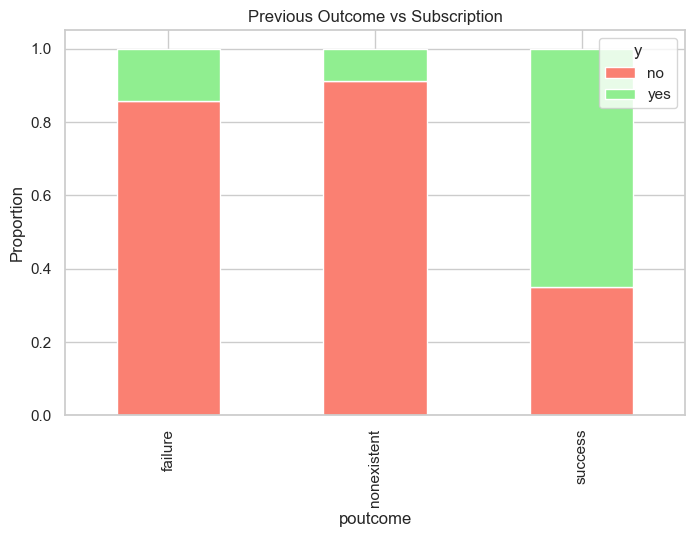

In [13]:
# Step 4: Previous Outcome vs Subscription Insight

prev_outcome_counts = pd.crosstab(df['poutcome'], df['y'], normalize='index')
prev_outcome_counts.plot(kind='bar', stacked=True, color=['salmon','lightgreen'], figsize=(8,5))
plt.title('Previous Outcome vs Subscription')
plt.ylabel('Proportion')
plt.show()


In [14]:
# Step 5: Duration Category vs Subscription Insight


fig5 = px.histogram(df, x='duration_category', color='y', barmode='group', title='Call Duration Category vs Subscription')
fig5.show()


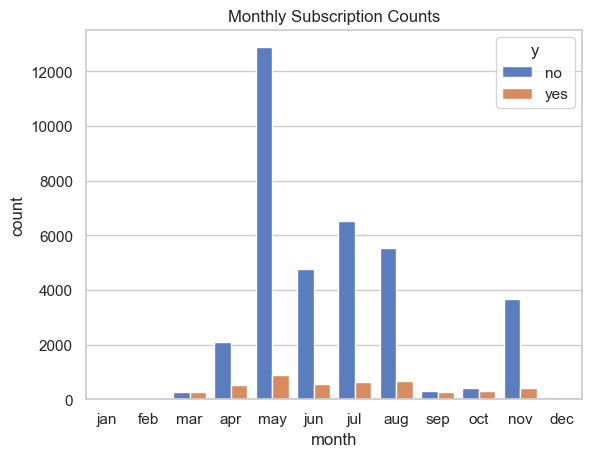

In [ ]:
# Step 6: Monthly trends insight

month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.countplot(x='month', hue='y', data=df, order=month_order)
plt.title('Monthly Subscription Counts')
plt.show()
